# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [104]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [105]:
image = imread("PROF_img/ladybug.jpg")
image.shape

(533, 800, 3)

Muestra la imagen para ver que se ha cargado bien

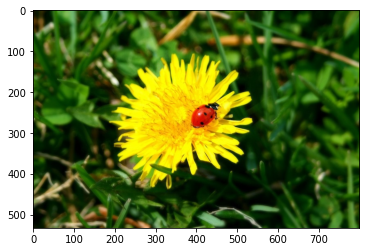

In [106]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [107]:
X = image.reshape(-1, 3)

In [108]:
X

array([[26, 29,  2],
       [25, 28,  1],
       [24, 28,  1],
       ...,
       [ 9, 59,  0],
       [ 7, 51,  0],
       [ 4, 48,  0]], dtype=uint8)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [109]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [110]:
kmeans.cluster_centers_

array([[ 24.77082203,  63.66226041,   4.23811544],
       [250.4712605 , 237.90917868,   8.21392968],
       [ 54.9834481 ,  97.42682418,  14.61809337],
       [  5.70724658,  27.72412429,   1.44980559],
       [ 94.18941702, 132.83758294,  39.46016776],
       [193.28489825,  52.17600857,  11.87790075],
       [155.35442289, 160.6112228 ,  98.27672658],
       [223.17824618, 184.71355748,  11.18133914]])

In [111]:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 3])

In [112]:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 3])

In [113]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [114]:
import numpy as np

In [115]:
segmented_img = np.round(segmented_img.reshape(image.shape)).astype(int)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [116]:
# segmented_img

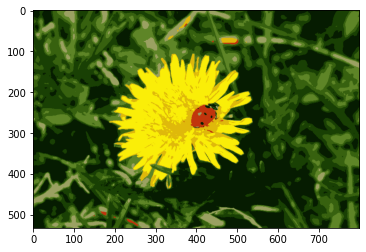

In [117]:
plt.imshow(segmented_img)
plt.savefig("mi_imagen.jpg")

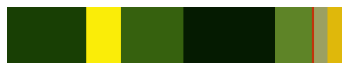

In [118]:
# import the necessary packages
import numpy as np
import cv2


def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    
    # return the bar chart
    return bar

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(kmeans)
bar = plot_colors(hist, kmeans.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar la imagen (siempre se mostrará)

In [10]:
def create_seg_image(image, n_colors, save = False):
    
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    
    plt.imshow(segmented_img)
    
    if save:
        plt.savefig("mi_imagen.jpg")